In [56]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project8_hotel_cancellation_predict_randomforest")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x: "% .3f" %x)

In [57]:
pwd

'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project8_hotel_cancellation_predict_randomforest'

In [58]:
data=pd.read_csv(r"ML Project - Random Forest Hotel Cancellation Prediction Analysis 16955485770.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.000,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000,NaN,0,Transient,75.000,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000,NaN,0,Transient,98.000,0,1,Check-Out,03/07/2015


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [60]:
(data.isnull().sum()/len(data))*100

hotel                              0.000
is_canceled                        0.000
lead_time                          0.000
arrival_date_year                  0.000
arrival_date_month                 0.000
arrival_date_week_number           0.000
arrival_date_day_of_month          0.000
stays_in_weekend_nights            0.000
stays_in_week_nights               0.000
adults                             0.000
children                           0.003
babies                             0.000
meal                               0.000
country                            0.409
market_segment                     0.000
distribution_channel               0.000
is_repeated_guest                  0.000
previous_cancellations             0.000
previous_bookings_not_canceled     0.000
reserved_room_type                 0.000
assigned_room_type                 0.000
booking_changes                    0.000
deposit_type                       0.000
agent                             13.686
company         

In [61]:
data["company"].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [62]:
data=data.drop("company",axis=1)

In [63]:
data["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [65]:
data["country"].unique()
data["country"]=data["country"].fillna("Unknown")

In [66]:
data["children"]=data["children"].fillna(data["children"].mean())

In [64]:
data["agent"]=data["agent"].fillna(data["agent"].median())

In [67]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [68]:
num_col=data.select_dtypes(exclude="object")
cat_col=data.select_dtypes(include="object")

In [69]:
num_col.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [70]:
cat_col.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

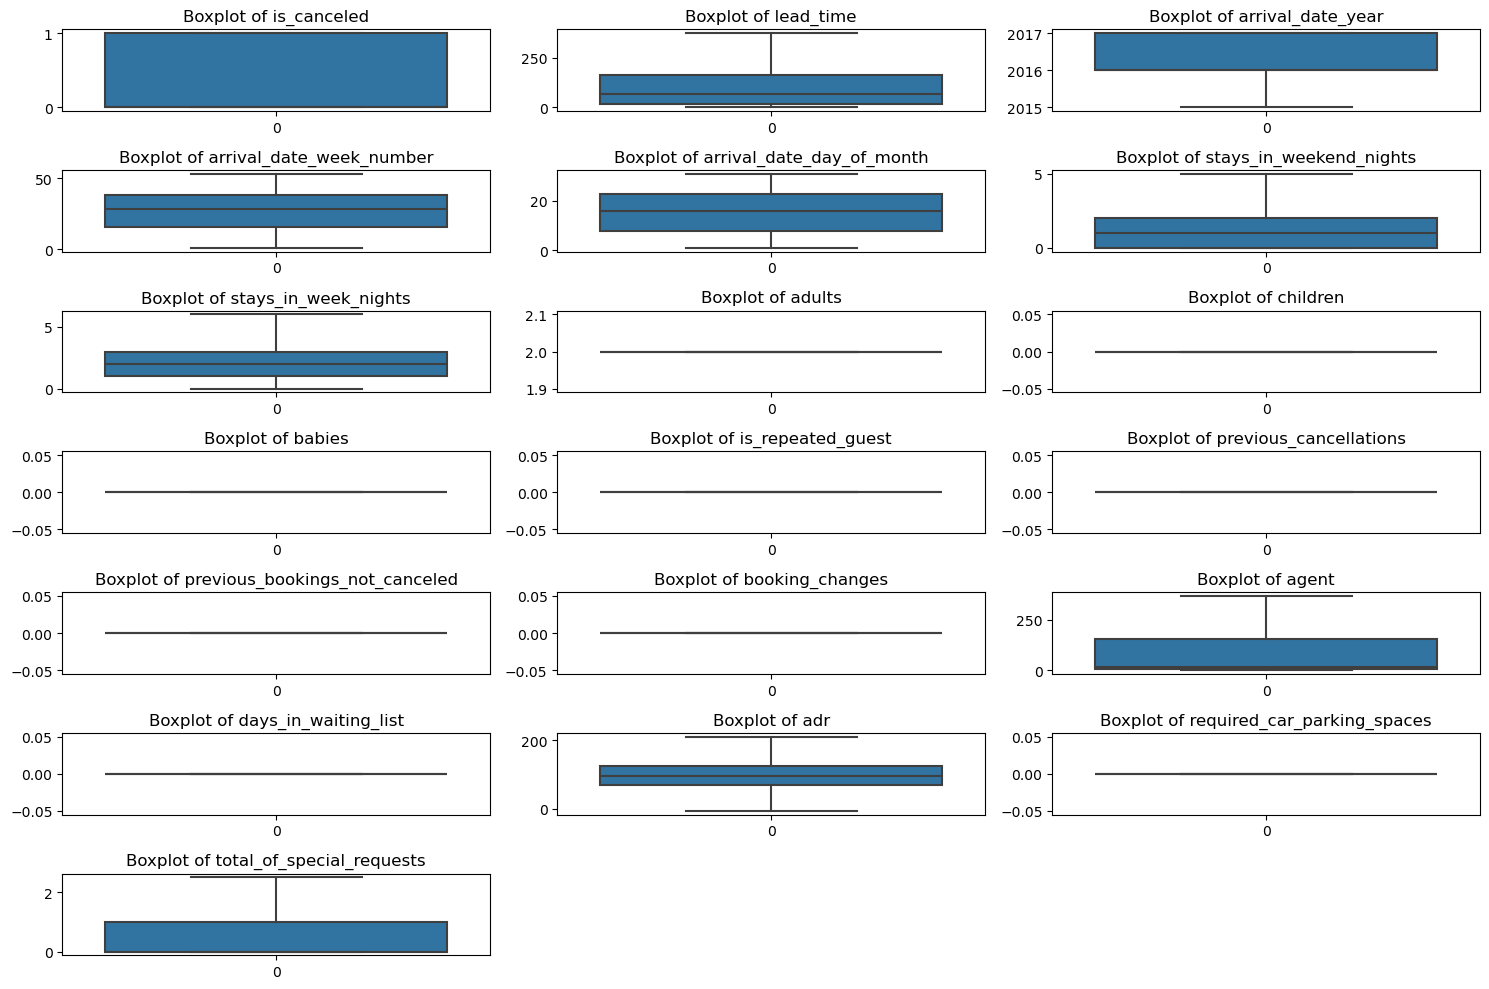

In [73]:
### very Important loop for checking boxplots of numeric columns and outlier treatment
n_cols=3
n_rows=int(np.ceil(len(num_col.columns)/n_cols))

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,10))
axes=axes.flatten()

### Loop through for numeric columns
for i,col in enumerate(num_col.columns):
    sns.boxplot(num_col[col],ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

    
## hide any unused axes
for i in range(len(num_col.columns),len(axes)):
    fig.delaxes(axes[i]) ## Remove empty subplots
    
plt.tight_layout()
plt.show()

In [72]:
def outlier_removal(data,columns):
    for col in columns:
        feature=data[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        lower_lim=float(q1-(1.5*IQR))
        upper_lim=float(q3+(1.5*IQR))

        ### NOW LIMIT outliers
        data[col]=np.where(data[col] < lower_lim, lower_lim,data[col])
        data[col]=np.where(data[col] > upper_lim, upper_lim,data[col])
    return data

num_col=outlier_removal(num_col,num_col.columns)

In [74]:
data=pd.concat((num_col,cat_col),axis=1)

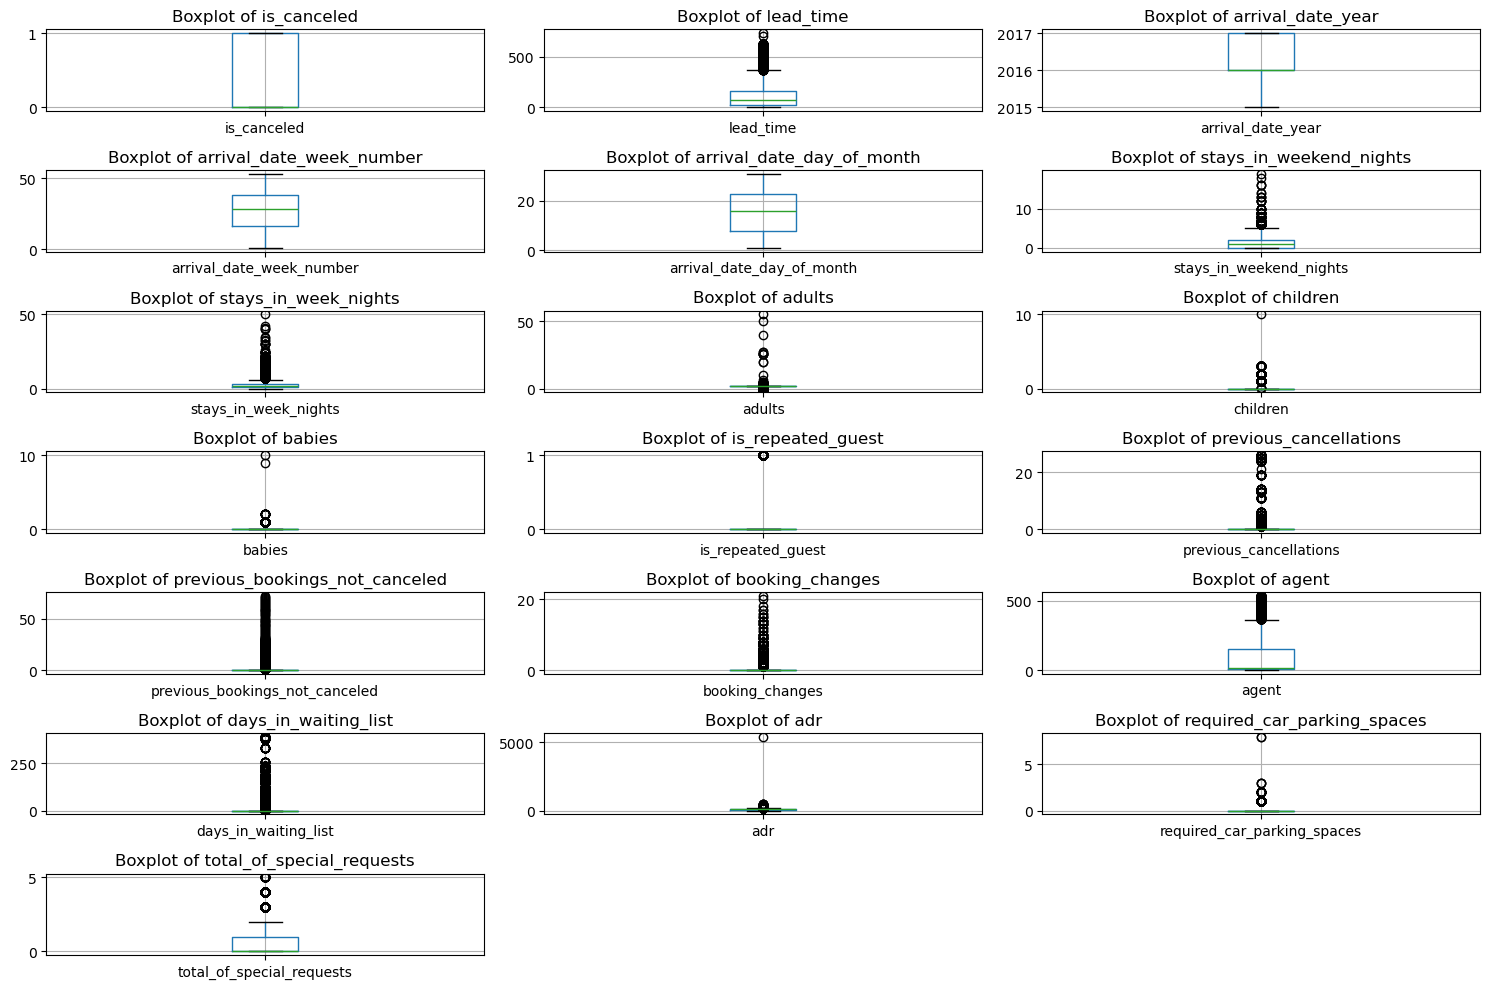

In [24]:
### very Important loop for checking boxplots of numeric columns and outlier treatment
n_cols=3
n_rows=int(np.ceil(len(num_col.columns)/n_cols))

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,10))
axes=axes.flatten()

### Loop through for numeric columns
for i,col in enumerate(num_col.columns):
    sns.boxplot(column=col,data=num_col,ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

    
## hide any unused axes
for i in range(len(num_col.columns),len(axes)):
    fig.delaxes(axes[i]) ## Remove empty subplots
    
plt.tight_layout()
plt.show()

In [75]:
cat_col

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01/07/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01/07/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02/07/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02/07/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,06/09/2017
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,07/09/2017
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,07/09/2017
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,07/09/2017


In [76]:
cat_col["arrival_date_month"].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder

In [79]:
model=LabelEncoder()

In [80]:
cat_col=cat_col.apply(model.fit_transform)

In [81]:
cat_col

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,5,0,135,3,1,2,2,0,2,1,15
1,1,5,0,135,3,1,2,2,0,2,1,15
2,1,5,0,59,3,1,0,2,0,2,1,46
3,1,5,0,59,2,0,0,0,0,2,1,46
4,1,5,0,59,6,3,0,0,0,2,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,15,5,3,0,0,0,2,1,179
119386,0,1,0,56,6,3,4,4,0,2,1,208
119387,0,1,0,43,6,3,3,3,0,2,1,208
119388,0,1,0,59,6,3,0,0,0,2,1,208


In [82]:
data=pd.concat((num_col,cat_col),axis=1)

In [33]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0.000,342.000,2015.000,27.000,1.000,0.000,0.000,2.000,0.000,0.000,...,0,135,3,1,2,2,0,2,1,15
1,0.000,373.000,2015.000,27.000,1.000,0.000,0.000,2.000,0.000,0.000,...,0,135,3,1,2,2,0,2,1,15
2,0.000,7.000,2015.000,27.000,1.000,0.000,1.000,2.000,0.000,0.000,...,0,59,3,1,0,2,0,2,1,46
3,0.000,13.000,2015.000,27.000,1.000,0.000,1.000,2.000,0.000,0.000,...,0,59,2,0,0,0,0,2,1,46
4,0.000,14.000,2015.000,27.000,1.000,0.000,2.000,2.000,0.000,0.000,...,0,59,6,3,0,0,0,2,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.000,23.000,2017.000,35.000,30.000,2.000,5.000,2.000,0.000,0.000,...,0,15,5,3,0,0,0,2,1,179
119386,0.000,102.000,2017.000,35.000,31.000,2.000,5.000,2.000,0.000,0.000,...,0,56,6,3,4,4,0,2,1,208
119387,0.000,34.000,2017.000,35.000,31.000,2.000,5.000,2.000,0.000,0.000,...,0,43,6,3,3,3,0,2,1,208
119388,0.000,109.000,2017.000,35.000,31.000,2.000,5.000,2.000,0.000,0.000,...,0,59,6,3,0,0,0,2,1,208


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [85]:
x=data.drop("is_canceled",axis=1)
y=data["is_canceled"]

In [86]:
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=42)

In [87]:
data["is_canceled"].value_counts()

is_canceled
0.000    75166
1.000    44224
Name: count, dtype: int64

In [88]:
x_train.shape

(95512, 30)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xb
import catboost as cb


In [90]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,roc_curve

In [91]:
lis=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB,xb.XGBClassifier,cb.CatBoostClassifier]

In [92]:
output_result={
    "Model Name":[],
    "Train Accuracy":[],
    "Test Accuracy":[],
    "Recall 0":[],
    "Recall 1":[],
    "Precision 0":[],
    "Precision 1":[],
    "F1 score 0":[],
    "F1 score 1":[]
}

In [44]:
for model_class in lis:
    model=model_class()
    name=model_class.__name__
    
    output_result["Model Name"].append(name)
    print(f"Model Name:-> {name}")
    model.fit(x_train,y_train)
    
    train_acc=model.score(x_train,y_train)
    output_result["Train Accuracy"].append(train_acc)
    print(f"Train accuracy:-> {train_acc}")
    
    
    test_acc=model.score(x_test,y_test)
    output_result["Test Accuracy"].append(test_acc)
    print(f"Test accuracy:->{test_acc}")
    
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[::,1]
    
    auc_score=roc_auc_score(y_test,y_pred_proba)
    print(f"Auc score:--->{auc_score}")
    
    Recall=recall_score(y_test,y_pred,average=None)
    output_result["Recall 0"].append(Recall[0])
    output_result["Recall 1"].append(Recall[1])
    print(f"Recall score :-> {Recall}")
    
    
    
    Precision=precision_score(y_test,y_pred,average=None)
    output_result["Precision 0"].append(Precision[0])
    output_result["Precision 1"].append(Precision[1])
    print(f"Precision score :->{Precision}")
    
    
    f1=f1_score(y_test,y_pred,average=None)
    output_result["F1 score 0"].append(f1[0])
    output_result["F1 score 1"].append(f1[1])
    print(f"F1 score :-> {f1}")
    print("\n\n")
    
    
    
    

Model Name:-> LogisticRegression
Train accuracy:-> 0.8137616215763465
Test accuracy:->0.8149761286539912
Auc score:--->0.8682576521679238
Recall score :-> [0.88146508 0.70449225]
Precision score :->[0.83211956 0.78150117]
F1 score :-> [0.85608183 0.74100129]



Model Name:-> DecisionTreeClassifier
Train accuracy:-> 1.0
Test accuracy:->1.0
Auc score:--->1.0
Recall score :-> [1. 1.]
Precision score :->[1. 1.]
F1 score :-> [1. 1.]



Model Name:-> RandomForestClassifier
Train accuracy:-> 1.0
Test accuracy:->1.0
Auc score:--->1.0
Recall score :-> [1. 1.]
Precision score :->[1. 1.]
F1 score :-> [1. 1.]



Model Name:-> GradientBoostingClassifier
Train accuracy:-> 1.0
Test accuracy:->1.0
Auc score:--->1.0
Recall score :-> [1. 1.]
Precision score :->[1. 1.]
F1 score :-> [1. 1.]



Model Name:-> KNeighborsClassifier
Train accuracy:-> 0.884349610520144
Test accuracy:->0.8320211072954183
Auc score:--->0.8927140303471237
Recall score :-> [0.90984101 0.70270873]
Precision score :->[0.83567468 0.82

134:	learn: 0.0001360	total: 8.09s	remaining: 51.8s
135:	learn: 0.0001360	total: 8.13s	remaining: 51.7s
136:	learn: 0.0001360	total: 8.18s	remaining: 51.5s
137:	learn: 0.0001360	total: 8.22s	remaining: 51.4s
138:	learn: 0.0001360	total: 8.26s	remaining: 51.2s
139:	learn: 0.0001360	total: 8.32s	remaining: 51.1s
140:	learn: 0.0001360	total: 8.37s	remaining: 51s
141:	learn: 0.0001360	total: 8.41s	remaining: 50.8s
142:	learn: 0.0001360	total: 8.45s	remaining: 50.7s
143:	learn: 0.0001360	total: 8.5s	remaining: 50.5s
144:	learn: 0.0001360	total: 8.55s	remaining: 50.4s
145:	learn: 0.0001360	total: 8.59s	remaining: 50.3s
146:	learn: 0.0001360	total: 8.64s	remaining: 50.1s
147:	learn: 0.0001360	total: 8.68s	remaining: 50s
148:	learn: 0.0001360	total: 8.73s	remaining: 49.8s
149:	learn: 0.0001360	total: 8.78s	remaining: 49.8s
150:	learn: 0.0001360	total: 8.82s	remaining: 49.6s
151:	learn: 0.0001360	total: 8.87s	remaining: 49.5s
152:	learn: 0.0001360	total: 8.92s	remaining: 49.4s
153:	learn: 0.000

295:	learn: 0.0001360	total: 18.1s	remaining: 43s
296:	learn: 0.0001360	total: 18.1s	remaining: 42.9s
297:	learn: 0.0001360	total: 18.2s	remaining: 42.8s
298:	learn: 0.0001360	total: 18.2s	remaining: 42.7s
299:	learn: 0.0001360	total: 18.3s	remaining: 42.6s
300:	learn: 0.0001360	total: 18.3s	remaining: 42.5s
301:	learn: 0.0001360	total: 18.4s	remaining: 42.5s
302:	learn: 0.0001360	total: 18.4s	remaining: 42.4s
303:	learn: 0.0001360	total: 18.5s	remaining: 42.3s
304:	learn: 0.0001360	total: 18.5s	remaining: 42.2s
305:	learn: 0.0001360	total: 18.6s	remaining: 42.1s
306:	learn: 0.0001360	total: 18.6s	remaining: 42s
307:	learn: 0.0001360	total: 18.6s	remaining: 41.9s
308:	learn: 0.0001360	total: 18.7s	remaining: 41.9s
309:	learn: 0.0001360	total: 18.8s	remaining: 41.8s
310:	learn: 0.0001360	total: 18.8s	remaining: 41.7s
311:	learn: 0.0001360	total: 18.9s	remaining: 41.6s
312:	learn: 0.0001360	total: 18.9s	remaining: 41.5s
313:	learn: 0.0001360	total: 19s	remaining: 41.4s
314:	learn: 0.0001

455:	learn: 0.0001360	total: 27.7s	remaining: 33s
456:	learn: 0.0001360	total: 27.8s	remaining: 33s
457:	learn: 0.0001360	total: 27.8s	remaining: 32.9s
458:	learn: 0.0001360	total: 27.9s	remaining: 32.9s
459:	learn: 0.0001360	total: 27.9s	remaining: 32.8s
460:	learn: 0.0001360	total: 28s	remaining: 32.8s
461:	learn: 0.0001360	total: 28.1s	remaining: 32.7s
462:	learn: 0.0001360	total: 28.2s	remaining: 32.7s
463:	learn: 0.0001360	total: 28.2s	remaining: 32.6s
464:	learn: 0.0001360	total: 28.3s	remaining: 32.5s
465:	learn: 0.0001360	total: 28.3s	remaining: 32.4s
466:	learn: 0.0001360	total: 28.4s	remaining: 32.4s
467:	learn: 0.0001360	total: 28.5s	remaining: 32.4s
468:	learn: 0.0001360	total: 28.5s	remaining: 32.3s
469:	learn: 0.0001360	total: 28.6s	remaining: 32.2s
470:	learn: 0.0001360	total: 28.6s	remaining: 32.1s
471:	learn: 0.0001360	total: 28.7s	remaining: 32.1s
472:	learn: 0.0001360	total: 28.7s	remaining: 32s
473:	learn: 0.0001360	total: 28.8s	remaining: 31.9s
474:	learn: 0.000136

617:	learn: 0.0001360	total: 38s	remaining: 23.5s
618:	learn: 0.0001360	total: 38s	remaining: 23.4s
619:	learn: 0.0001360	total: 38.1s	remaining: 23.3s
620:	learn: 0.0001360	total: 38.1s	remaining: 23.3s
621:	learn: 0.0001360	total: 38.2s	remaining: 23.2s
622:	learn: 0.0001360	total: 38.2s	remaining: 23.1s
623:	learn: 0.0001360	total: 38.3s	remaining: 23.1s
624:	learn: 0.0001360	total: 38.3s	remaining: 23s
625:	learn: 0.0001360	total: 38.4s	remaining: 22.9s
626:	learn: 0.0001360	total: 38.4s	remaining: 22.9s
627:	learn: 0.0001360	total: 38.5s	remaining: 22.8s
628:	learn: 0.0001360	total: 38.6s	remaining: 22.7s
629:	learn: 0.0001360	total: 38.6s	remaining: 22.7s
630:	learn: 0.0001360	total: 38.7s	remaining: 22.6s
631:	learn: 0.0001360	total: 38.8s	remaining: 22.6s
632:	learn: 0.0001360	total: 38.8s	remaining: 22.5s
633:	learn: 0.0001360	total: 38.9s	remaining: 22.4s
634:	learn: 0.0001360	total: 39s	remaining: 22.4s
635:	learn: 0.0001360	total: 39.1s	remaining: 22.4s
636:	learn: 0.000136

777:	learn: 0.0001360	total: 47.7s	remaining: 13.6s
778:	learn: 0.0001360	total: 47.7s	remaining: 13.5s
779:	learn: 0.0001360	total: 47.8s	remaining: 13.5s
780:	learn: 0.0001360	total: 47.8s	remaining: 13.4s
781:	learn: 0.0001360	total: 47.9s	remaining: 13.3s
782:	learn: 0.0001360	total: 47.9s	remaining: 13.3s
783:	learn: 0.0001360	total: 48s	remaining: 13.2s
784:	learn: 0.0001360	total: 48.1s	remaining: 13.2s
785:	learn: 0.0001360	total: 48.1s	remaining: 13.1s
786:	learn: 0.0001360	total: 48.2s	remaining: 13s
787:	learn: 0.0001360	total: 48.2s	remaining: 13s
788:	learn: 0.0001360	total: 48.3s	remaining: 12.9s
789:	learn: 0.0001360	total: 48.3s	remaining: 12.8s
790:	learn: 0.0001360	total: 48.4s	remaining: 12.8s
791:	learn: 0.0001360	total: 48.4s	remaining: 12.7s
792:	learn: 0.0001360	total: 48.5s	remaining: 12.7s
793:	learn: 0.0001360	total: 48.5s	remaining: 12.6s
794:	learn: 0.0001360	total: 48.6s	remaining: 12.5s
795:	learn: 0.0001360	total: 48.6s	remaining: 12.5s
796:	learn: 0.0001

936:	learn: 0.0001360	total: 57s	remaining: 3.83s
937:	learn: 0.0001360	total: 57.1s	remaining: 3.77s
938:	learn: 0.0001360	total: 57.2s	remaining: 3.71s
939:	learn: 0.0001360	total: 57.2s	remaining: 3.65s
940:	learn: 0.0001360	total: 57.2s	remaining: 3.59s
941:	learn: 0.0001360	total: 57.3s	remaining: 3.53s
942:	learn: 0.0001360	total: 57.4s	remaining: 3.47s
943:	learn: 0.0001360	total: 57.5s	remaining: 3.41s
944:	learn: 0.0001360	total: 57.5s	remaining: 3.35s
945:	learn: 0.0001360	total: 57.6s	remaining: 3.29s
946:	learn: 0.0001360	total: 57.6s	remaining: 3.23s
947:	learn: 0.0001360	total: 57.7s	remaining: 3.17s
948:	learn: 0.0001360	total: 57.8s	remaining: 3.11s
949:	learn: 0.0001360	total: 57.9s	remaining: 3.04s
950:	learn: 0.0001360	total: 57.9s	remaining: 2.98s
951:	learn: 0.0001360	total: 58s	remaining: 2.92s
952:	learn: 0.0001360	total: 58s	remaining: 2.86s
953:	learn: 0.0001360	total: 58.1s	remaining: 2.8s
954:	learn: 0.0001360	total: 58.2s	remaining: 2.74s
955:	learn: 0.00013

In [45]:
output_result=pd.DataFrame(output_result)
output_result

,Model Name,Train Accuracy,Test Accuracy,Recall 0,Recall 1,Precision 0,Precision 1,F1 score 0,F1 score 1
0,LogisticRegression,0.814,0.815,0.881,0.704,0.832,0.782,0.856,0.741
1,DecisionTreeClassifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,RandomForestClassifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,GradientBoostingClassifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
4,KNeighborsClassifier,0.884,0.832,0.910,0.703,0.836,0.824,0.871,0.759
5,GaussianNB,0.998,0.998,0.997,1.000,1.000,0.996,0.999,0.998
6,XGBClassifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,CatBoostClassifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [46]:
from sklearn.model_selection import KFold,cross_val_score

In [47]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

for model in lis:
    model=model()
    print(f"Model name:{model}")
    model.fit(x,y)
    score=cross_val_score(model,x,y,cv=kf).mean()
    print(f"score:->{score}")

In [48]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [49]:
param={"random_state":[10,20,30,40],"n_estimators":[100,200,300,400],"max_depth":[6,7,8,9,10,11,12,13],"max_features":[0.5,0.75,1.0],"min_samples_split":[2,3,4,5],"max_samples":[0.5,0.75,1.0]}

In [50]:
grid=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param,cv=kf,n_jobs=2,verbose=0)

In [51]:
grid.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13],
                                        'max_features': [0.5, 0.75, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'random_state': [10, 20, 30, 40]})

In [52]:
best_param=grid.best_params_
print(best_param)

{'random_state': 20, 'n_estimators': 100, 'min_samples_split': 2, 'max_samples': 0.5, 'max_features': 0.5, 'max_depth': 12}


In [53]:
final_model=RandomForestClassifier(**best_param)
final_model.fit(x_train,y_train)

train_acc=final_model.score(x_train,y_train)
print(f"Train Accuracy:>{train_acc}")

test_acc=final_model.score(x_test,y_test)
print(f"Test Accuracy:>{test_acc}")

y_pred=final_model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[::,1]

auc_score=roc_auc_score(y_test,y_pred_proba)
print(f"Auc Score:--->{auc_score}")

recall=recall_score(y_test,y_pred)
print(recall)

precision=precision_score(y_test,y_pred)
print(precision)

f1=f1_score(y_test,y_pred)
print(f1)



Train Accuracy:>1.0
Test Accuracy:>1.0
Auc Score:--->1.0
1.0
1.0
1.0
